<a href="https://colab.research.google.com/github/mehrab-karim-antor/Machine_Learning/blob/main/Neural_Networking_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# ডেটাকে reshape এবং normalize করা
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

# লেবেলকে one-hot encode করা
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer 1
    layers.Dense(64, activation='relu'),                       # Hidden layer 2
    layers.Dense(10, activation='softmax')                     # Output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8690 - loss: 0.4431 - val_accuracy: 0.9662 - val_loss: 0.1164
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9660 - loss: 0.1122 - val_accuracy: 0.9722 - val_loss: 0.0941
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0738 - val_accuracy: 0.9748 - val_loss: 0.0897
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9822 - loss: 0.0558 - val_accuracy: 0.9790 - val_loss: 0.0779
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0401 - val_accuracy: 0.9777 - val_loss: 0.0806
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9798 - val_loss: 0.0769
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9802 - val_loss: 0.0833
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0209 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1173
Test Accuracy: 0.9783999919891357


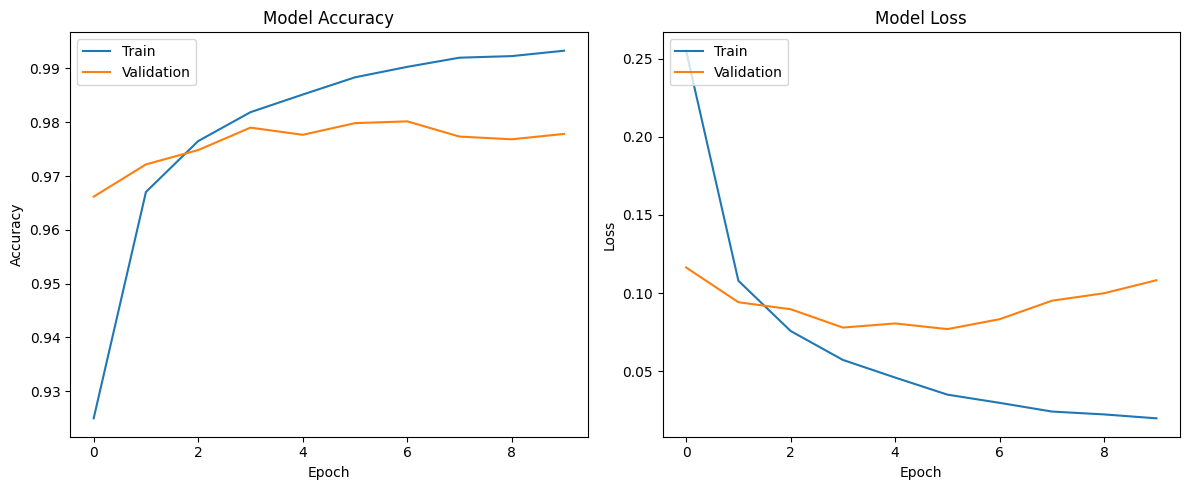

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Sample Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


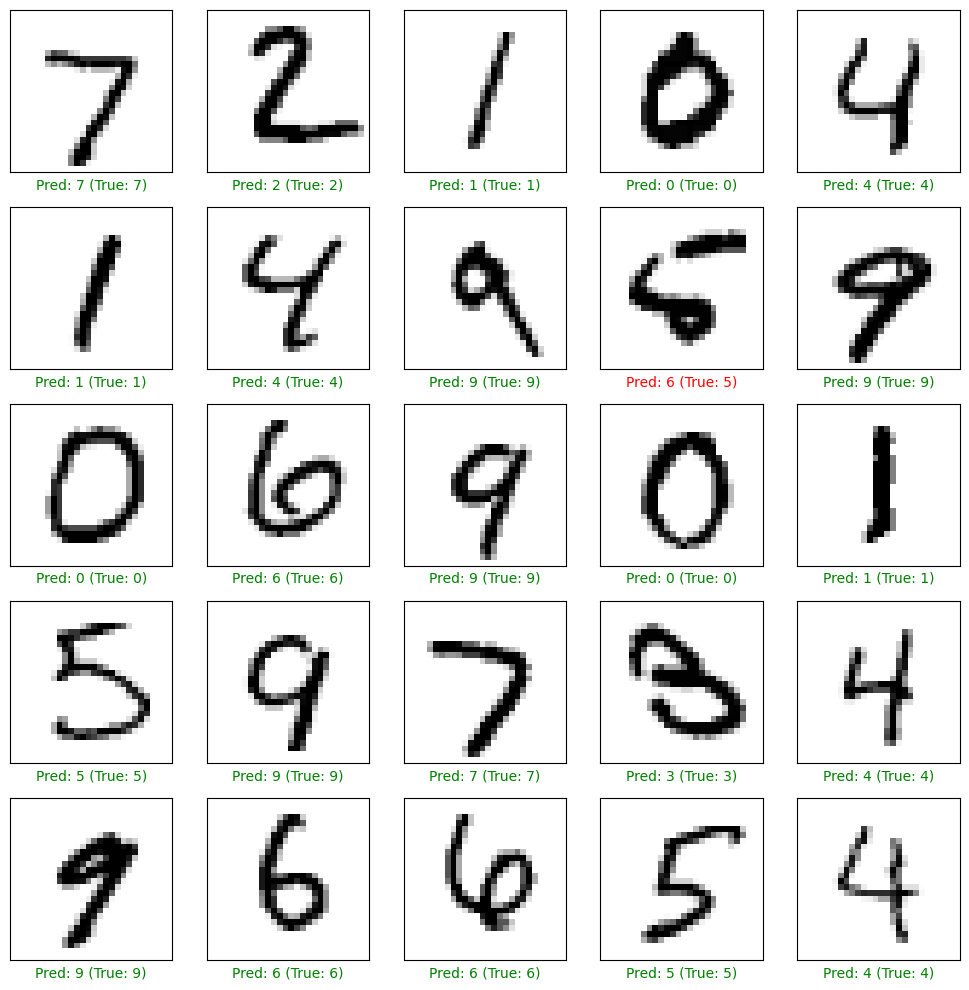

In [9]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Display some sample test images with predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.xlabel(f"Pred: {predicted_labels[i]} (True: {true_labels[i]})", color=color)
plt.tight_layout()
plt.show()

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9783 - val_loss: 0.0999
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9951 - loss: 0.0136 - val_accuracy: 0.9792 - val_loss: 0.1055
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9790 - val_loss: 0.1151
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9770 - val_loss: 0.1105
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9964 - loss: 0.0097 - val_accuracy: 0.9803 - val_loss: 0.1085
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0111 - val_accuracy: 0.9782 - val_loss: 0.1214
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9752 - val_loss: 0.1424
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0112 - 

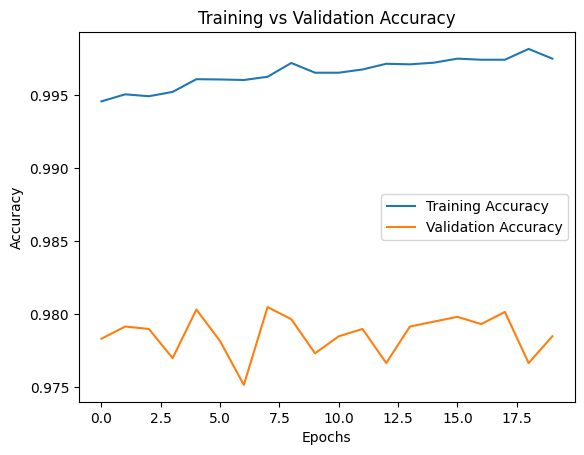

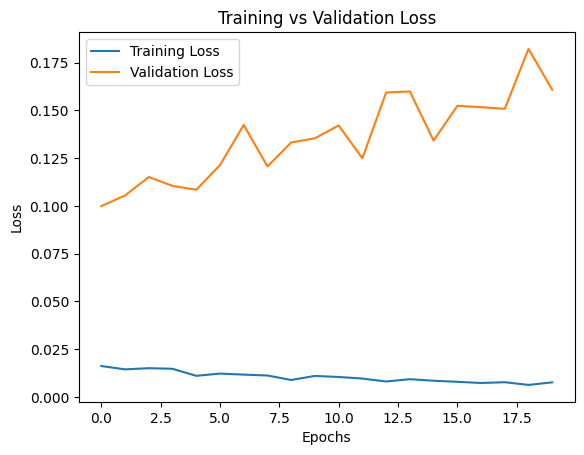

In [10]:
import matplotlib.pyplot as plt

# মডেল ট্রেন করা
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# Accuracy curve plot করা
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss curve plot করা
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()